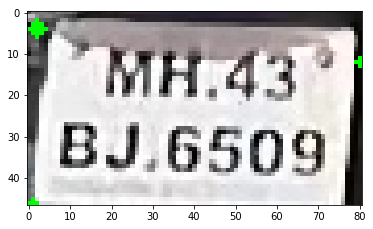

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('1T.png')
 
width, height = 91,91
pts1 = np.float32([[2,4],[81,12],[1,47],[76,54]])
pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]])
matrix = cv2.getPerspectiveTransform(pts1,pts2)
imgOutput = cv2.warpPerspective(img,matrix,(width,height))

for x in range (0,4):
    cv2.circle(img,(pts1[x][0],pts1[x][1]),2,(0,255,0),cv2.FILLED)

plt.imshow(img)
plt.show()

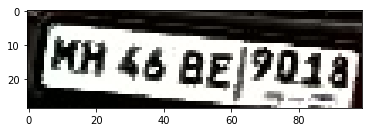

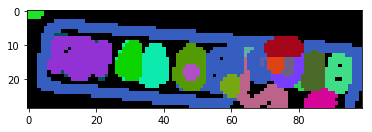

In [25]:
from __future__ import print_function
import cv2 as cv
import numpy as np
import argparse
import random as rng
import matplotlib.pyplot as plt

rng.seed(12345)
def thresh_callback(val):
    threshold = val
    # Detect edges using Canny
    canny_output = cv.Canny(src_gray, threshold, threshold * 2)
    # Find contours
    _, contours, hierarchy = cv.findContours(canny_output, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    # Draw contours
    drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)
    for i in range(len(contours)):
        color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
        cv.drawContours(drawing, contours, i, color, 2, cv.LINE_8, hierarchy, 0)
    # Show in a window
    plt.imshow(drawing)
    plt.show()
# Load source image
#parser = argparse.ArgumentParser(description='Code for Finding contours in your image tutorial.')
#parser.add_argument('--input', help='Path to input image.', default='../data/HappyFish.jpg')
#args = parser.parse_args()
src = cv.imread("4T.png")
if src is None:
    print('Could not open or find the image:', args.input)
    exit(0)
# Convert image to gray and blur it
src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
src_gray = cv.blur(src_gray, (3,3))
# Create Window
source_window = 'Source'
#cv.namedWindow(source_window)
plt.imshow(src)
plt.show()
max_thresh = 255
thresh = 100 # initial threshold
cv.createTrackbar('Canny Thresh:', source_window, thresh, max_thresh, thresh_callback)
thresh_callback(thresh)
#cv.waitKey()


In [22]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
def getContours(img, orig):  # Change - pass the original image too
    biggest = np.array([])
    maxArea = 0
    imgContour = orig.copy()  # Make a copy of the original image to return
    contours, hierarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    index = None
    for i, cnt in enumerate(contours):  # Change - also provide index
        area = cv2.contourArea(cnt)
        if area > 400:
            peri = cv2.arcLength(cnt, True)
            approx = cv2.approxPolyDP(cnt,0.02*peri, True)
            if area > maxArea and len(approx) == 4:
                biggest = approx
                maxArea = area
                index = i  # Also save index to contour

    warped = None  # Stores the warped license plate image
    if index is not None: # Draw the biggest contour on the image
        cv2.drawContours(imgContour, contours, index, (255, 0, 0), 3)

        src = np.squeeze(biggest).astype(np.float32) # Source points
        height = image.shape[0]
        width = image.shape[1]
        # Destination points
        dst = np.float32([[0, 0], [0, height - 1], [width - 1, 0], [width - 1, height - 1]])

        # Order the points correctly
        biggest = order_points(src)
        dst = order_points(dst)

        # Get the perspective transform
        M = cv2.getPerspectiveTransform(src, dst)

        # Warp the image
        img_shape = (width, height)
        warped = cv2.warpPerspective(orig, M, img_shape, flags=cv2.INTER_LINEAR)

    return biggest, imgContour, warped  # Change - also return drawn image

def order_points(pts):
    # Step 1: Find centre of object
    center = np.mean(pts)

    # Step 2: Move coordinate system to centre of object
    shifted = pts - center

    # Step #3: Find angles subtended from centroid to each corner point
    theta = np.arctan2(shifted[:, 0], shifted[:, 1])

    # Step #4: Return vertices ordered by theta
    ind = np.argsort(theta)
    return pts[ind]

kernel = np.ones((3,3))
image = cv2.imread('0T.png')

imgGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imgBlur = cv2.GaussianBlur(imgGray,(5,5),1)
imgCanny = cv2.Canny(imgBlur,150,200)
imgDial = cv2.dilate(imgCanny,kernel,iterations=2)
imgThres = cv2.erode(imgDial,kernel,iterations=2)
biggest, imgContour, warped = getContours(imgThres, image)  # Change

#biggest, imgContour, warped = getContours(imgThres, image)
titles = ['Original', 'Blur', 'Canny', 'Dilate', 'Threshold', 'Contours', 'Warped']  # Change - also show warped image
images = [image[...,::-1],  imgBlur, imgCanny, imgDial, imgThres, imgContour, warped]  # Change

# Change - Also show contour drawn image + warped image
for i in range(5):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])

plt.subplot(3, 3, 6)
plt.imshow(images[-2])
plt.title(titles[-2])

plt.subplot(3, 3, 8)
plt.imshow(images[5])
plt.title(titles[-1])

error: OpenCV(3.4.2) C:\projects\opencv-python\opencv\modules\imgproc\src\contours.cpp:199: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
largest_area=0;
largest_contour_index=0
img =cv2.imread('0T.png')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 40, 255, 0)
_,contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
for i in contours:
    area = cv2.contourArea(cnt)
    if (area>largest_area):
        largest_area=area
        largest_contour_index=i
        bounding_rect=cv2.boundingRect(cnt)
rect=img.bounding_rect()
plt.imshow(rect)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'bounding_rect'

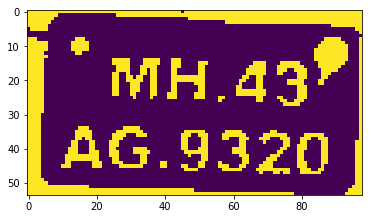

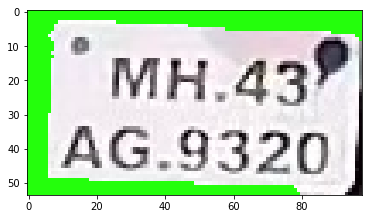

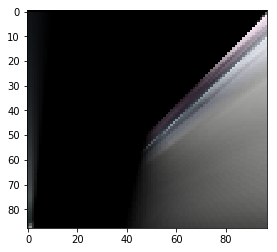

In [11]:
import cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt
def perspective_transform(image, corners):
    def order_corner_points(corners):
        # Separate corners into individual points
        # Index 0 - top-right
        #       1 - top-left
        #       2 - bottom-left
        #       3 - bottom-right
        corners = [(corner[0][0], corner[0][1]) for corner in corners]
        top_r, top_l, bottom_l, bottom_r = corners[0], corners[1], corners[2], corners[3]
        return (top_l, top_r, bottom_r, bottom_l)

    # Order points in clockwise order
    ordered_corners = order_corner_points(corners)
    top_l, top_r, bottom_r, bottom_l = ordered_corners

    # Determine width of new image which is the max distance between 
    # (bottom right and bottom left) or (top right and top left) x-coordinates
    width_A = np.sqrt(((bottom_r[0] - bottom_l[0]) ** 2) + ((bottom_r[1] - bottom_l[1]) ** 2))
    width_B = np.sqrt(((top_r[0] - top_l[0]) ** 2) + ((top_r[1] - top_l[1]) ** 2))
    width = max(int(width_A), int(width_B))

    # Determine height of new image which is the max distance between 
    # (top right and bottom right) or (top left and bottom left) y-coordinates
    height_A = np.sqrt(((top_r[0] - bottom_r[0]) ** 2) + ((top_r[1] - bottom_r[1]) ** 2))
    height_B = np.sqrt(((top_l[0] - bottom_l[0]) ** 2) + ((top_l[1] - bottom_l[1]) ** 2))
    height = max(int(height_A), int(height_B))

    # Construct new points to obtain top-down view of image in 
    # top_r, top_l, bottom_l, bottom_r order
    dimensions = np.array([[0, 0], [width - 1, 0], [width - 1, height - 1], 
                    [0, height - 1]], dtype = "float32")

    # Convert to Numpy format
    ordered_corners = np.array(ordered_corners, dtype="float32")

    # Find perspective transform matrix
    matrix = cv2.getPerspectiveTransform(ordered_corners, dimensions)

    # Transform the image
    transformed = cv2.warpPerspective(image, matrix, (width, height))

    # Rotate and return the result
    return imutils.rotate_bound(transformed, angle=-90)

image = cv2.imread('0T.png')
original = image.copy()
blur = cv2.bilateralFilter(image,9,75,75)
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray,0,255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.015 * peri, True)

    if len(approx) == 5:
        cv2.drawContours(image,[c], 0, (36,255,12), 3)
        transformed = perspective_transform(original, approx)

plt.imshow(thresh)
plt.show()
plt.imshow(image)
plt.show()
plt.imshow(transformed)
plt.show()